Exam 2 Question 1 \
Ben Kavouras

In [253]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# This is to specify the location of the .dat files for this assignment, Github did not like these files so I had to store them somewhere else
datapath = str(Path().cwd()).replace("Aerospace-Computing","Misc/")

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# My library
import kavouras1 as k
import textbook as t

# Inline outputs of matplotlib
%matplotlib inline

In [254]:
def myfunction(x):
    return (np.exp(2*x)-1)*np.sin(3*np.pi*x)*np.cos(4*np.pi*x)

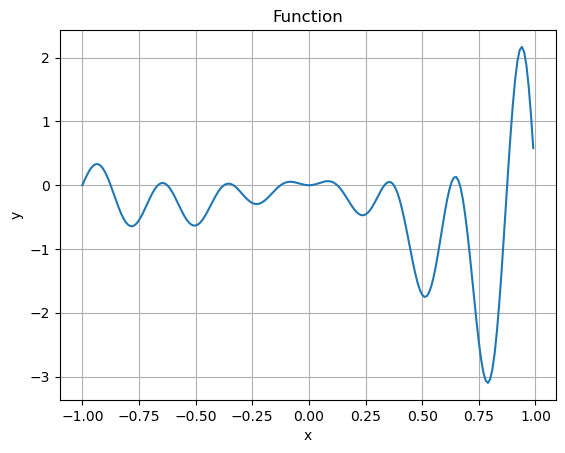

In [255]:
# Part A
xvals = np.arange(-1,1,.01)
yvals = np.array([])
for i in xvals:
    yvals = np.append(yvals,myfunction(i))

plt.plot(xvals,yvals,'-')
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

All I am doing in part A is taking the function 'myfunction' which returns the output of the exam function from a given input x, and computing that between -1 and 1, for every hundreth value.

Positive Root 1 for the function is 0.125000
Positive Root 2 for the function is 0.333333
Positive Root 3 for the function is 0.375000


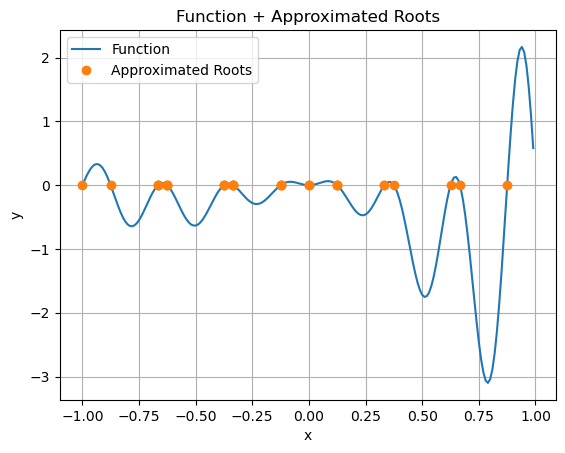

In [256]:
# Part B
dist = .0000001
deci = 6
roots = np.array([0,0])
for i in range(len(xvals)):
    if np.round(yvals[i],deci) == 0:
        roots = np.vstack((roots,[xvals[i],yvals[i]]))
    elif yvals[i] > 0 and i+1 < len(xvals):
        if yvals[i+1] < 0:
            tempx = np.arange(xvals[i],xvals[i+1],dist)
            for j in tempx:
                if np.round(myfunction(j),deci) == 0:
                    roots = np.vstack((roots,[j,myfunction(j)]))
    elif yvals[i] < 0 and i+1 < len(xvals):
        if yvals[i+1] > 0:
            tempx = np.arange(xvals[i],xvals[i+1],dist)
            for j in tempx:
                if np.round(myfunction(j),deci) == 0:
                    roots = np.vstack((roots,[j,myfunction(j)]))
count = 1
stored = 0
for i in roots:
    if np.round(i[0],deci) > 0 and np.round(i[0],deci) != stored:
        stored = np.round(i[0],deci)
        print("Positive Root %1d for the function is %8.6f" %(count,i[0]))
        count += 1
    if count > 3:
        break

plt.plot(xvals,yvals,'-',roots[:,0],roots[:,1],'o')
plt.title("Function + Approximated Roots")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['Function','Approximated Roots'])
plt.grid()
plt.show()

This is a little more complicated, probably more complex than needed. This looks across all of the values computed in part A, and looks to see if either A. there is a value equal to 0, or B. if there is a value, where the following value changes sign. If B is met, it then looks at every value 'dist' apart between that value and the following value, and sees if any of those are zero. if they are, then it saves that value. This doesn't work for some of the roots however, because some of the roots are .3 or .6 repeating, I added an additional part, where it rounds the values that are extremely close to 0, so it can include those

In [257]:
# Part C
def forwarddifference(f,x,h=1e-5):
    return (f(x+h)-f(x))/h
cvals = np.array([0.0,0.5,1.0,1.5,2.0])
cys = np.array([])
for i in cvals:
    cys = np.append(cys,forwarddifference(myfunction,i))
for i in range(len(cvals)):
    print("The approximated derivative value for %3.1f is %10.8f" %(cvals[i],cys[i]))

The approximated derivative value for 0.0 is 0.00018850
The approximated derivative value for 0.5 is -5.43449811
The approximated derivative value for 1.0 is -60.21682737
The approximated derivative value for 1.5 is 40.14792923
The approximated derivative value for 2.0 is 505.16095004


This takes the function, and uses the forward difference method used on HW6 for the values given in the exam

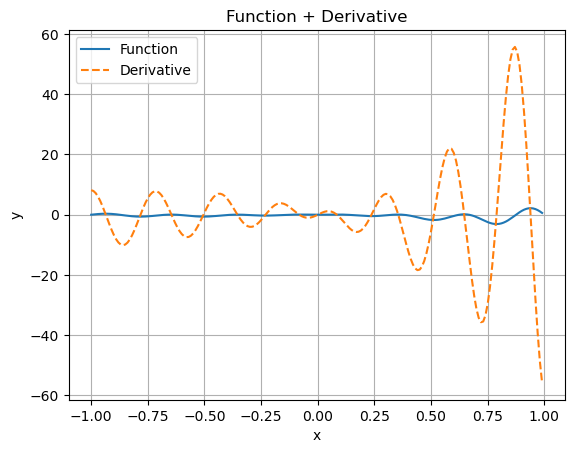

In [258]:
# Part D
deryvals = np.array([])
for i in xvals:
    deryvals = np.append(deryvals,forwarddifference(myfunction,i))
plt.plot(xvals,yvals,'-',xvals,deryvals,'--')
plt.title("Function + Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['Function','Derivative'])
plt.grid()
plt.show()

This does the exact same thing done in part C, across all of the x values from part A

In [259]:
# Part E
rootheld = 0
for i in roots:
    if np.round(i[0],deci) > 0:
        rootheld = i[0]
        break
x = sp.Symbol('x')
F1 = (sp.E**(2*x)-1)*sp.sin(3*sp.pi*x)*sp.cos(4*sp.pi*x)
integration = sp.Integral(F1,(x,0,rootheld))
print("The definite integral from 0 to %9.6f is %9.6f" %(rootheld,integration))

The definite integral from 0 to  0.125000 is  0.004350


This uses the Sympy Integral method to calculate the function, now in the sympy format, from 0 to the first positive root found in part B